# **Parte 1: Preparación de la base**

In [2]:
#instalar spacy

!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 66.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
#cargar librerias

import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline


In [5]:
# Abrir y leer el contenido del archivo
with open("/content/5_ANTIOQUIA_PDD_2020_2023.txt", "r", encoding="utf-8") as file:
    texto = file.read()

In [6]:
# Cargar modelo en español
try:
    nlp = spacy.load("es_core_news_sm")

except Exception as e:
    print(f"Error loading spacy model: {e}")
    raise

nlp.max_length = 1500000

# Procesar el texto con spaCy
doc = nlp(texto)

# **Parte 2: Limpieza y Tokenización**

In [26]:
import re

# Dividir por líneas estratégicas con formato formal
patron = r"(\d\.\s+L[IÍ]NEA ESTRAT[EÉ]GICA\s+\d\.\s+NUESTR[AO]\s+[A-ZÁÉÍÓÚÑ ]+)"
secciones = re.split(patron, texto)

# Combinar título y contenido
lineas = {}
for i in range(1, len(secciones), 2):
    titulo = secciones[i].strip()
    contenido = secciones[i + 1].strip()
    lineas[titulo] = contenido

# Mostrar los títulos encontrados
for titulo in lineas:
    print(f"Sección detectada: {titulo}")

Sección detectada: 1. LÍNEA ESTRATÉGICA 1. NUESTRA GENTE
Sección detectada: 2. LÍNEA ESTRATÉGICA 2. NUESTRA ECONOMÍA
Sección detectada: 3. LÍNEA ESTRATÉGICA 3. NUESTRO PLANETA
Sección detectada: 4. LÍNEA ESTRATÉGICA 4. NUESTRA VIDA
Sección detectada: 5. LÍNEA ESTRATÉGICA 5. NUESTRA GOBERNANZA


In [27]:
# Extraer lemas (excluyendo puntuación y espacios)
lematizado = " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])

In [28]:
# Obtener la lista de stopwords del modelo de spaCy
STOP_WORDS = nlp.Defaults.stop_words

# Agregar stopwords extra
stopwords_extra = {
            "número", "acumular", "meta", "base", "línea", "indicador", "nombre",
            "unidad", "forma", "disponible", "cuatrienio", "medida", "proceso", "cálculo",
            "responsable", "dependencia", "objetivo", "presentar", "departamento", "secretaría",
            "gobernación", "antioquia", "administración", "territorio", "año", "tipo", "sistema", "geográfico"
        }
STOP_WORDS.update(stopwords_extra)

In [29]:
# Limpiar y lematizar
tokens_limpios = [
    token.lemma_.lower()
    for token in doc
    if not token.is_punct                      # eliminar puntuación
    and not token.is_space                     # eliminar espacios
    and not token.is_digit                     # eliminar números
    and token.lemma_.lower() not in STOP_WORDS # eliminar stopwords
    and len(token) > 2                         # eliminar tokens muy cortos
]

# Unir los tokens en una sola cadena
texto_limpio = " ".join(tokens_limpios)

In [30]:
# Limpieza de cada una de las lineas
lineas_limpias = {}
for titulo, contenido in lineas.items():
    doc = nlp(contenido)
    lematizado = " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])
    # Limpiar y lematizar
    tokens_limpios = [
        token.lemma_.lower()
        for token in doc
        if not token.is_punct                      # eliminar puntuación
        and not token.is_space                     # eliminar espacios
        and not token.is_digit                     # eliminar números
        and token.lemma_.lower() not in STOP_WORDS # eliminar stopwords
        and len(token) > 2                         # eliminar tokens muy cortos
    ]
    lineas_limpias[titulo] = " ".join(tokens_limpios)
    print(f"Linea: {titulo}  se a limpiado")

Linea: 1. LÍNEA ESTRATÉGICA 1. NUESTRA GENTE  se a limpiado
Linea: 2. LÍNEA ESTRATÉGICA 2. NUESTRA ECONOMÍA  se a limpiado
Linea: 3. LÍNEA ESTRATÉGICA 3. NUESTRO PLANETA  se a limpiado
Linea: 4. LÍNEA ESTRATÉGICA 4. NUESTRA VIDA  se a limpiado
Linea: 5. LÍNEA ESTRATÉGICA 5. NUESTRA GOBERNANZA  se a limpiado


In [31]:
# Calcula e imprime las 50 palabras lematizadas más frecuentes en el texto,

from collections import Counter

conteo = Counter([t.lemma_.lower() for t in doc if t.is_alpha and not t.is_stop])

# Imprimir las 50 palabras más frecuentes
for palabra, freq in conteo.most_common(50):
    print(f"{palabra}: {freq}")


antioquia: 285
desarrollo: 242
secretaría: 196
gestión: 156
información: 156
departamento: 147
gobernación: 143
indicador: 139
línea: 134
público: 132
social: 131
sistema: 118
gobierno: 117
plan: 117
base: 116
departamental: 106
participación: 104
permitir: 100
dependencia: 99
nacional: 95
recurso: 93
responsable: 89
programa: 83
objetivo: 81
número: 78
forma: 76
meta: 75
administrativo: 75
salud: 74
organizacional: 74
acumulado: 74
cultura: 72
dato: 71
porcentaje: 70
capacidad: 69
administración: 68
fortalecimiento: 67
cuatrienio: 67
planeación: 66
año: 65
medida: 64
técnico: 61
proceso: 61
general: 60
unidad: 58
ciudadana: 58
fuente: 57
mejorar: 56
proyecto: 56
política: 55


In [12]:
# Guardar en archivo nuevo
with open("/content/5_ANTIOQUIA_PDD_2020_2023_limpio.txt", "w", encoding="utf-8") as f:
    f.write(texto_limpio)

print("✅ Texto limpiado y guardado como '5_ANTIOQUIA_PDD_2020_2023_limpio.txt'")

✅ Texto limpiado y guardado como '5_ANTIOQUIA_PDD_2020_2023_limpio.txt'


# **Parte 3: Agrupación por categorías y frecuencia**

In [ ]:
# Contar frecuencia de las palabras de la lista tokens limpios
conteo = Counter(tokens_limpios)

# Diccionarios temáticos
clase_social = {"pobreza", "empleo", "trabajo", "equidad", "desigualdad", "ingreso"}
genero = {"mujeres", "género", "embarazo", "igualdad", "violencia", "madre"}
etnia = {"afrodescendiente", "indígena", "etnia", "ancestral", "raza", "comunidad"}
etario = {"niños", "niño", "jovenes", "joven", "adultos", "adulto", "adulto mayor"}
territorio = {"rural", "urbano", "territorio", "municipio", "vereda", "subregión"}
institucional = {"plan", "desarrollo", "estado", "gobierno", "programa", "gestión", "modelo"}

# Agrupación
agrupaciones = {
    "Clase social": [],
    "Género": [],
    "Etnia": [],
    "Territorio": [],
    "Institucional": []
}

# Mostrar la frecuencia de todas las palabras en cada grupo
for palabra, freq in conteo.items():
    if palabra in clase_social:
        agrupaciones["Clase social"].append((palabra, freq))
    elif palabra in genero:
        agrupaciones["Género"].append((palabra, freq))
    elif palabra in etnia:
        agrupaciones["Etnia"].append((palabra, freq))
    elif palabra in territorio:
        agrupaciones["Territorio"].append((palabra, freq))
    elif palabra in institucional:
        agrupaciones["Institucional"].append((palabra, freq))

In [ ]:
# Visualizar cada categoría con todas sus palabras

for categoria, palabras in agrupaciones.items():
    if palabras:
        palabras_ordenadas = sorted(palabras, key=lambda x: x[1], reverse=True)
        etiquetas, valores = zip(*palabras_ordenadas)

        plt.figure(figsize=(10, 5))
        plt.barh(etiquetas, valores, color='darkcyan')
        plt.xlabel("Frecuencia")
        plt.title(f"Términos sociológicos en la categoría: {categoria}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


# **Parte 4: Nube de palabras de las palabras filtradas relevantes**

In [32]:
# Generar una nube de palabras con las palabras filtradas

palabras_filtradas = tokens_limpios

texto_completo = " ".join(palabras_filtradas)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(texto_completo)

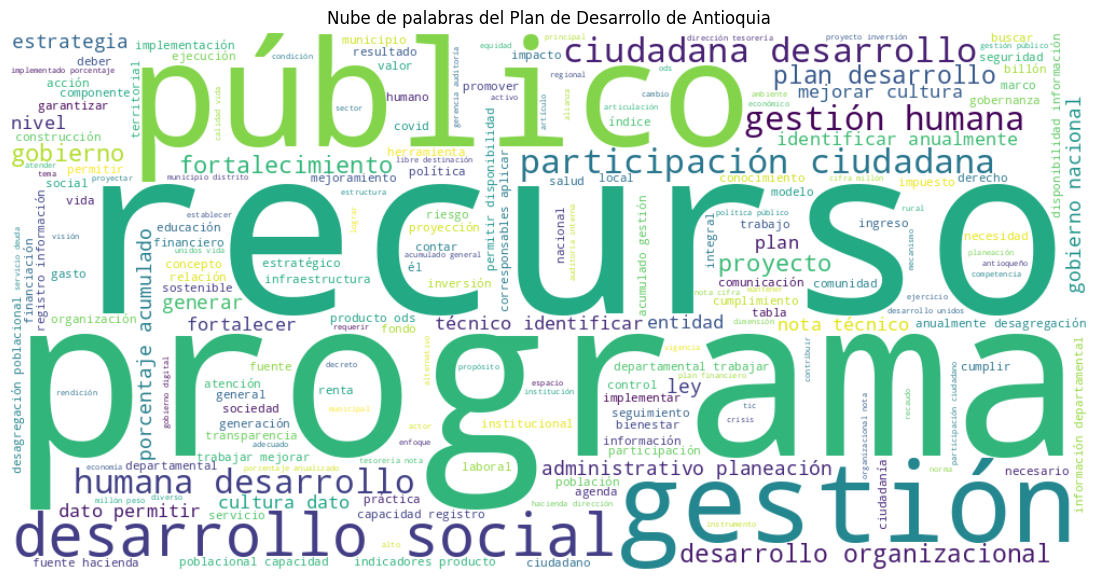

In [33]:
# Mostrar la nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras del Plan de Desarrollo de Antioquia")
plt.show()

In [34]:
# Generar nube de palabras por cada una de las lineas estrategicas
nube_palabras_por_linea = {}
for titulo, contenido in lineas_limpias.items():
  nube_palabras_por_linea[titulo] = WordCloud(
      width=1000,
      height=500,
      background_color='white',
      colormap='viridis',
      max_words=100
  ).generate(contenido)

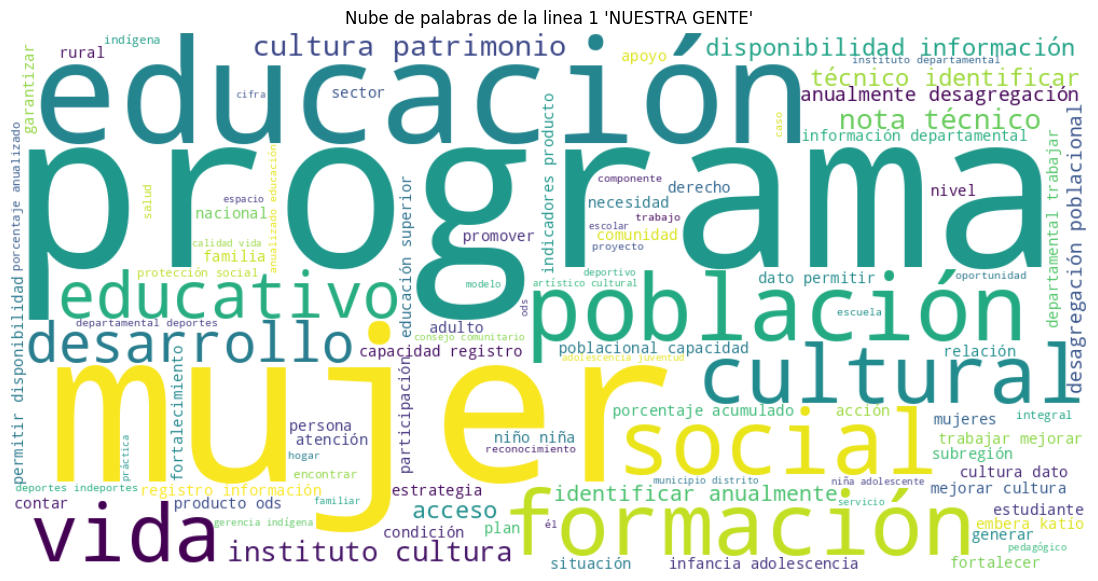

In [35]:
# Mostrar la nube de palabras para la linea 1
plt.figure(figsize=(15, 7))
plt.imshow(nube_palabras_por_linea['1. LÍNEA ESTRATÉGICA 1. NUESTRA GENTE'], interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de la linea 1 'NUESTRA GENTE'")
plt.show()

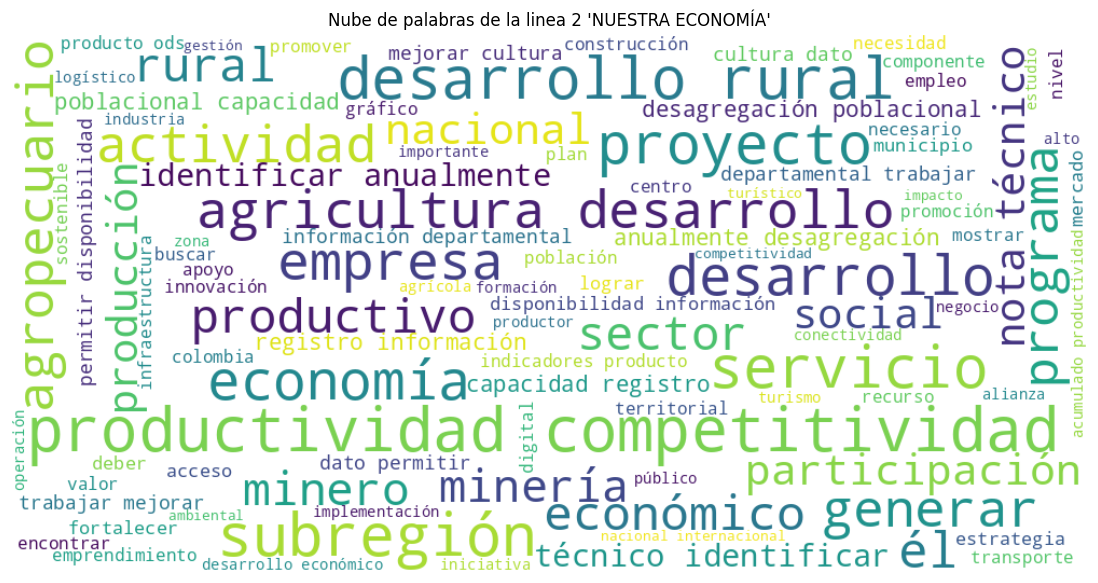

In [36]:
# Mostrar la nube de palabras para la linea 2
plt.figure(figsize=(15, 7))
plt.imshow(nube_palabras_por_linea['2. LÍNEA ESTRATÉGICA 2. NUESTRA ECONOMÍA'], interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de la linea 2 'NUESTRA ECONOMÍA'")
plt.show()

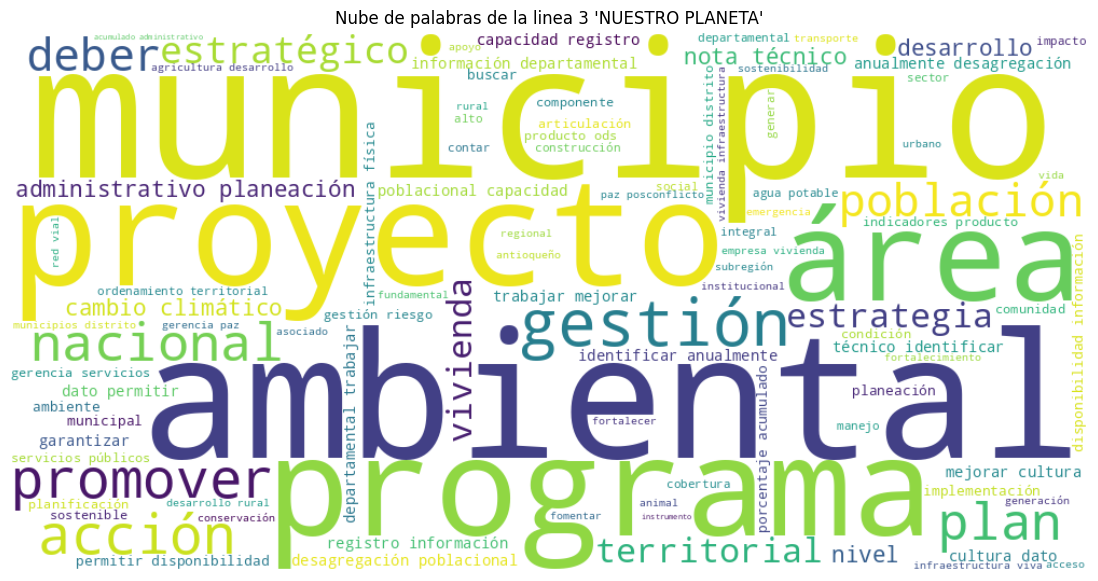

In [37]:
# Mostrar la nube de palabras para la linea 3
plt.figure(figsize=(15, 7))
plt.imshow(nube_palabras_por_linea['3. LÍNEA ESTRATÉGICA 3. NUESTRO PLANETA'], interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de la linea 3 'NUESTRO PLANETA'")
plt.show()

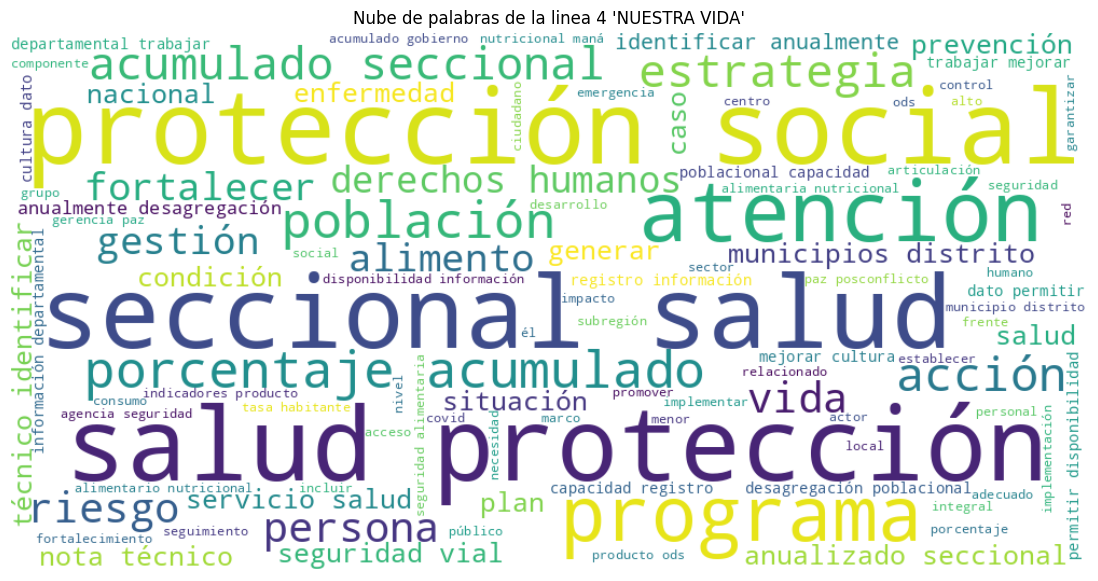

In [38]:
# Mostrar la nube de palabras para la linea 4
plt.figure(figsize=(15, 7))
plt.imshow(nube_palabras_por_linea['4. LÍNEA ESTRATÉGICA 4. NUESTRA VIDA'], interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de la linea 4 'NUESTRA VIDA'")
plt.show()

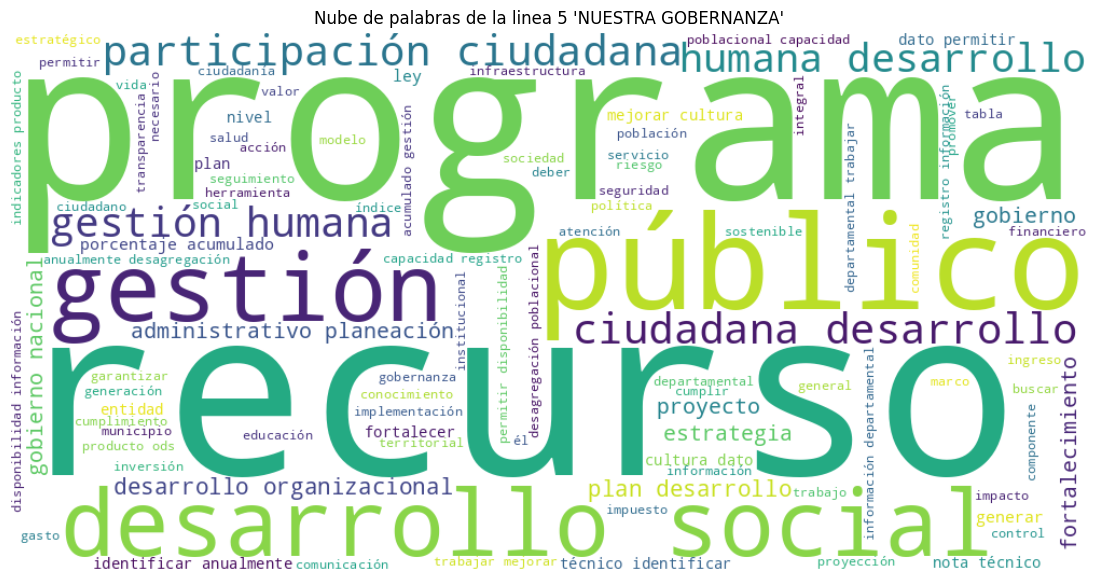

In [39]:
# Mostrar la nube de palabras para la linea 5
plt.figure(figsize=(15, 7))
plt.imshow(nube_palabras_por_linea['5. LÍNEA ESTRATÉGICA 5. NUESTRA GOBERNANZA'], interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de la linea 5 'NUESTRA GOBERNANZA'")
plt.show()

# **Parte 5: Análisis de sentimientos del texto**

In [ ]:
# Cargar modelo de análisis de sentimientos multilingüe
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Dividir el texto en fragmentos de máximo 512 caracteres (límite del modelo)
fragmentos = [texto_limpio[i:i+512] for i in range(0, len(texto_limpio), 512)]

In [ ]:
# Analizar sentimientos por fragmento
resultados = [sentiment_pipeline(f)[0] for f in fragmentos]

In [ ]:
# Contar resultados
from collections import Counter
resumen_sentimientos = Counter([r['label'] for r in resultados])

In [ ]:
# Mostrar resumen
print("Resumen de sentimiento por fragmentos:")
for etiqueta, cantidad in resumen_sentimientos.items():
    print(f"{etiqueta}: {cantidad}")

Resumen de sentimiento por fragmentos:
3 stars: 547
4 stars: 633
1 star: 536
5 stars: 74
2 stars: 69


In [ ]:
# ## Parte 6: Análisis de Sentimiento por Categoría Temporal

# Definir palabras clave para cada categoría temporal
palabras_actualidad_pasado = {
    "actualidad", "estado actual", "status quo", "hoy", "actualmente",
    "diagnóstico", "situación", "realidad", "histórico", "pasado", "previamente"
}

palabras_futuro = {
    "mejorar", "meta", "objetivo", "visión", "futuro", "espera", "proyecta",
    "lograr", "alcanzar", "propuesta", "iniciativa", "transformar"
}

# Inicializar contadores y listas para cada categoría
fragmentos_actualidad_pasado = []
fragmentos_futuro = []
fragmentos_otros = [] # Para fragmentos que no encajen en ninguna categoría

resultados_actualidad_pasado = []
resultados_futuro = []
resultados_otros = []

# Iterar a través de los fragmentos y clasificarlos
for fragmento in fragmentos:
    # Convertir fragmento a minúsculas para comparación sin distinción de mayúsculas
    fragmento_lower = fragmento.lower()

    # Lematizar el fragmento para una mejor coincidencia de palabras clave
    doc_fragmento = nlp(fragmento_lower)
    lemas_fragmento = {token.lemma_ for token in doc_fragmento if token.is_alpha} # Usar un set para búsqueda eficiente

    # Clasificar el fragmento
    es_actualidad_pasado = any(palabra in lemas_fragmento for palabra in palabras_actualidad_pasado)
    es_futuro = any(palabra in lemas_fragmento for palabra in palabras_futuro)

    if es_actualidad_pasado and not es_futuro:
        fragmentos_actualidad_pasado.append(fragmento)
    elif es_futuro and not es_actualidad_pasado:
        fragmentos_futuro.append(fragmento)
    else:
        # Si un fragmento contiene palabras de ambas categorías o de ninguna
        fragmentos_otros.append(fragmento)

print(f"Fragmentos clasificados: {len(fragmentos_actualidad_pasado)} de actualidad/pasado, {len(fragmentos_futuro)} de futuro, {len(fragmentos_otros)} otros.")

# Analizar sentimiento para cada categoría
if fragmentos_actualidad_pasado:
    resultados_actualidad_pasado = sentiment_pipeline(fragmentos_actualidad_pasado)
    resumen_sentimientos_actualidad_pasado = Counter([r['label'] for r in resultados_actualidad_pasado])
    print("\nResumen de sentimiento para fragmentos de actualidad/pasado:")
    for etiqueta, cantidad in resumen_sentimientos_actualidad_pasado.items():
        print(f"{etiqueta}: {cantidad}")

if fragmentos_futuro:
    resultados_futuro = sentiment_pipeline(fragmentos_futuro)
    resumen_sentimientos_futuro = Counter([r['label'] for r in resultados_futuro])
    print("\nResumen de sentimiento para fragmentos de futuro:")
    for etiqueta, cantidad in resumen_sentimientos_futuro.items():
        print(f"{etiqueta}: {cantidad}")

if fragmentos_otros:
    resultados_otros = sentiment_pipeline(fragmentos_otros)
    resumen_sentimientos_otros = Counter([r['label'] for r in resultados_otros])
    print("\nResumen de sentimiento para otros fragmentos:")
    for etiqueta, cantidad in resumen_sentimientos_otros.items():
        print(f"{etiqueta}: {cantidad}")

Fragmentos clasificados: 134 de actualidad/pasado, 801 de futuro, 924 otros.

Resumen de sentimiento para fragmentos de actualidad/pasado:
4 stars: 34
3 stars: 27
1 star: 58
2 stars: 12
5 stars: 3

Resumen de sentimiento para fragmentos de futuro:
3 stars: 303
4 stars: 297
2 stars: 20
5 stars: 34
1 star: 147

Resumen de sentimiento para otros fragmentos:
3 stars: 217
4 stars: 302
1 star: 331
5 stars: 37
2 stars: 37


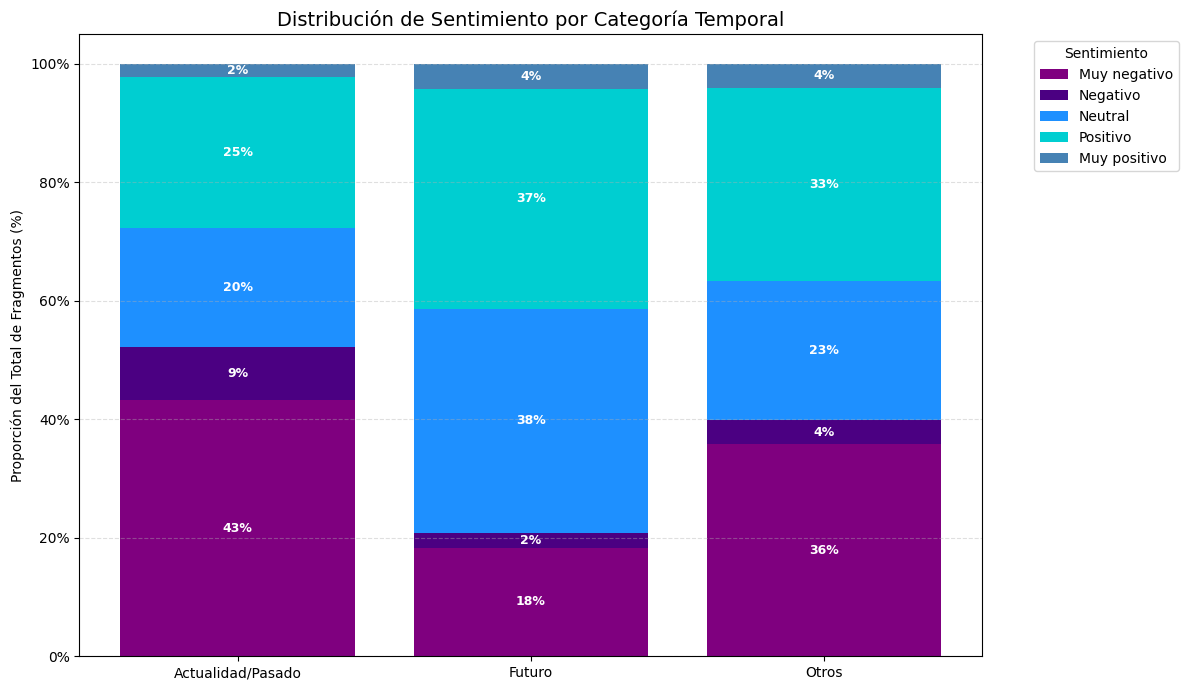

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos reales
resumen_sentimientos_actualidad_pasado = {
    '1 star': 58, '2 star': 12, '3 star': 27, '4 star': 34, '5 star': 3
}
resumen_sentimientos_futuro = {
    '1 star': 147, '2 star': 20, '3 star': 303, '4 star': 297, '5 star': 34
}
resumen_sentimientos_otros = {
    '1 star': 331, '2 star': 37, '3 star': 217, '4 star': 302, '5 star': 37
}

# Configuraciones
categorias = ['Actualidad/Pasado', 'Futuro', 'Otros']
etiquetas_sentimiento_ordenadas = ['1 star', '2 star', '3 star', '4 star', '5 star']
descripciones_sentimiento = {
    '1 star': 'Muy negativo', '2 star': 'Negativo', '3 star': 'Neutral',
    '4 star': 'Positivo', '5 star': 'Muy positivo'
}
resultados_por_categoria = {
    'Actualidad/Pasado': resumen_sentimientos_actualidad_pasado,
    'Futuro': resumen_sentimientos_futuro,
    'Otros': resumen_sentimientos_otros
}

# Preparar datos
data_list = []
for categoria in categorias:
    conteo = resultados_por_categoria[categoria]
    total = sum(conteo.values())
    for etiqueta in etiquetas_sentimiento_ordenadas:
        count = conteo.get(etiqueta, 0)
        proporcion = count / total if total > 0 else 0
        data_list.append({
            'Categoría': categoria,
            'Sentimiento': descripciones_sentimiento[etiqueta],
            'Proporción': proporcion
        })

df_plot = pd.DataFrame(data_list)
df_pivot = df_plot.pivot(index='Categoría', columns='Sentimiento', values='Proporción').fillna(0)
df_pivot = df_pivot[['Muy negativo', 'Negativo', 'Neutral', 'Positivo', 'Muy positivo']]

# Colores personalizados
colores_personalizados = {
    'Muy negativo': '#7f007f',  # Púrpura oscuro
    'Negativo': '#4b0082',      # Azul índigo
    'Neutral': '#1e90ff',       # Azul dodger
    'Positivo': '#00ced1',      # Azul turquesa oscuro
    'Muy positivo': '#4682b4'   # Azul acero
}

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 7))
bottom = [0] * len(df_pivot)

for sentimiento in df_pivot.columns:
    valores = df_pivot[sentimiento].values
    ax.bar(df_pivot.index, valores, label=sentimiento, bottom=bottom,
           color=colores_personalizados[sentimiento])
    bottom = [i + j for i, j in zip(bottom, valores)]

# Añadir etiquetas
for i, categoria in enumerate(df_pivot.index):
    altura_base = 0
    for sentimiento in df_pivot.columns:
        valor = df_pivot.loc[categoria, sentimiento]
        if valor > 0.02:
            ax.text(i, altura_base + valor / 2, f"{valor:.0%}", ha='center', va='center',
                    color='white', fontsize=9, weight='bold')
        altura_base += valor

# Estética final
ax.set_ylabel('Proporción del Total de Fragmentos (%)')
ax.set_title('Distribución de Sentimiento por Categoría Temporal', fontsize=14)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax.legend(title="Sentimiento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# **Parte 6: Analisis de proyectos en areas sociales**


In [40]:
!pip install seaborn pandas

In [44]:
# -------- Definir temas y palabras clave --------
temas = {
    # Temas altamente sociales
    "educación": ["educación", "docente", "escuela", "estudiante", "formación", "institución"],
    "salud": ["salud", "hospital", "enfermedad", "epidemia", "servicio médico", "vida"],
    "pobreza": ["pobreza", "equidad", "vulnerabilidad", "desigualdad", "derecho"],
    "seguridad": ["seguridad", "violencia", "convivencia", "conflicto", "paz", "protección"],
    "empleo": ["empleo", "trabajo", "laboral", "empleabilidad", "formación laboral"],
    "diversidad": ["inclusión", "mujer", "lgtb", "indígena", "igualdad"],

    # Temas no tan sociales:
    "economía": ["economía", "productividad", "competitividad", "sector económico", "financiero", "mercado", "económico"],
    "industria": ["industria", "industrial", "manufactura", "procesamiento", "producción", "minería", "minero", "agricultura", "innovación"],
    "infraestructura": ["infraestructura", "carretera", "puente", "vía", "movilidad", "transporte", "vivienda"],
    "medio ambiente": ["medio ambiente", "sostenibilidad", "biodiversidad", "recursos naturales", "ecología", "cambio climático", "ambiental", "territorial"],
    "ciencia y tecnología": ["innovación", "ciencia", "tecnología", "investigación", "desarrollo tecnológico"]
}


In [45]:
!python -m spacy download es_core_news_sm
import spacy

# -------- Función de lematización --------
def lematizar(texto):
    doc = nlp(texto)
    return ' '.join([t.lemma_ for t in doc if not t.is_stop and not t.is_punct])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 66.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [51]:
import re
import spacy
import pandas as pd
from collections import defaultdict

# -------- 4. Detectar proyectos y clasificarlos por tema --------
conteo_temas = defaultdict(lambda: defaultdict(int))

# Patrón de detección de proyectos
patron_proyecto = re.compile(r'(proyecto|programa|componente|iniciativa|estrategia)[^.\n]{20,400}', re.IGNORECASE) # Busca los parrafos donde dice proyecto,programa,componente,iniciativa o estrategia

for nombre_linea, contenido in lineas.items():
    # Extraer fragmentos que parezcan proyectos
    proyectos = patron_proyecto.findall(contenido)

    # Alternativamente: oraciones que contengan palabras clave
    oraciones = re.split(r'[.:\n]', contenido)
    proyectos = [o.strip() for o in oraciones if any(k in o.lower() for k in ["proyecto", "programa", "componente", "iniciativa", "estrategia"])]

    print(f"🔎 {nombre_linea}: {len(proyectos)} proyectos detectados")

    for p in proyectos:
        texto_lematizado = lematizar(p.lower())

        # Clasificar por tema
        for tema, palabras in temas.items():
            if any(pal in texto_lematizado for pal in palabras):
                conteo_temas[nombre_linea][tema] += 1

# -------- 5. Crear DataFrame resumen --------
df_temas = pd.DataFrame(conteo_temas).fillna(0).astype(int).T
df_temas["Total Proyectos"] = df_temas.sum(axis=1)

# -------- 5.1 Agregar fila total por tema --------
totales_por_tema = df_temas.drop(columns=["Total Proyectos"]).sum(axis=0)
totales_por_tema["Total Proyectos"] = df_temas["Total Proyectos"].sum()
df_temas.loc["Total General"] = totales_por_tema
df_temas


🔎 1. LÍNEA ESTRATÉGICA 1. NUESTRA GENTE: 251 proyectos detectados
🔎 2. LÍNEA ESTRATÉGICA 2. NUESTRA ECONOMÍA: 178 proyectos detectados
🔎 3. LÍNEA ESTRATÉGICA 3. NUESTRO PLANETA: 201 proyectos detectados
🔎 4. LÍNEA ESTRATÉGICA 4. NUESTRA VIDA: 166 proyectos detectados
🔎 5. LÍNEA ESTRATÉGICA 5. NUESTRA GOBERNANZA: 196 proyectos detectados


,salud,pobreza,diversidad,seguridad,educación,empleo,ciencia y tecnología,medio ambiente,economía,infraestructura,industria,Total Proyectos
1. LÍNEA ESTRATÉGICA 1. NUESTRA GENTE,44,36,42,28,67,12,8,23,24,4,3,291
2. LÍNEA ESTRATÉGICA 2. NUESTRA ECONOMÍA,26,2,3,11,20,6,24,9,42,10,31,184
3. LÍNEA ESTRATÉGICA 3. NUESTRO PLANETA,24,10,2,34,15,0,5,49,12,30,6,187
4. LÍNEA ESTRATÉGICA 4. NUESTRA VIDA,72,17,4,48,26,7,9,13,7,6,12,221
5. LÍNEA ESTRATÉGICA 5. NUESTRA GOBERNANZA,24,6,1,18,26,13,7,15,21,10,5,146
Total General,190,71,52,139,154,38,53,109,106,60,57,1029


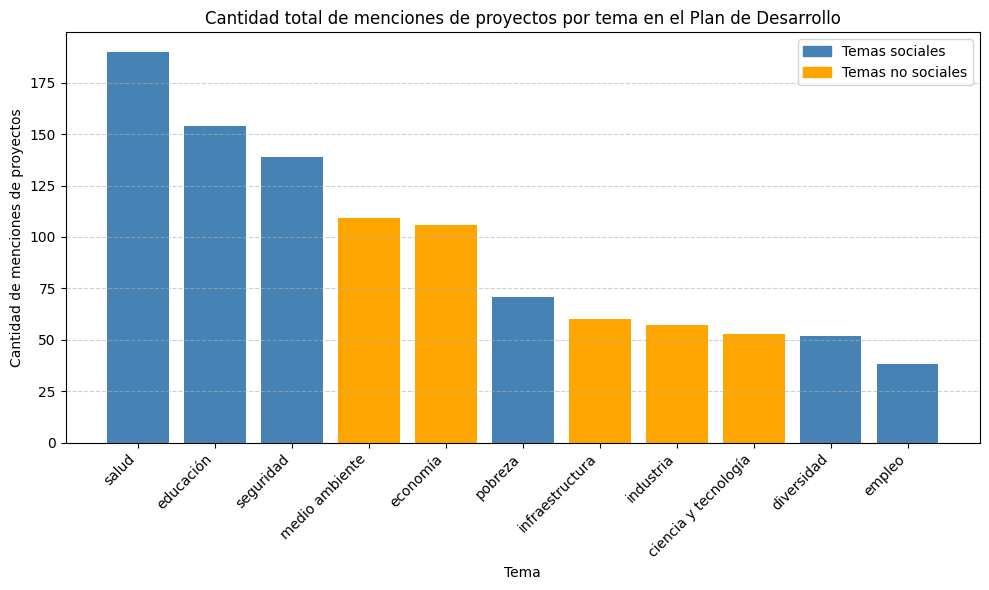

In [55]:
# Creación de un grafico de barras para visualizar
import matplotlib.pyplot as plt

# Temas clasificados
temas_sociales = ["educación", "salud", "pobreza", "seguridad", "empleo", "diversidad"]
temas_no_sociales = ["economía", "industria", "infraestructura", "medio ambiente", "ciencia y tecnología"]

# Obtener totales y ordenar de mayor a menor
totales = df_temas.loc["Total General"].drop("Total Proyectos").sort_values(ascending=False)


# Definir colores personalizados
colores = [
    "steelblue" if tema in temas_sociales else "orange"
    for tema in totales.index
]

# Crear gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(totales.index, totales.values, color=colores)

# Estética
plt.title("Cantidad total de menciones de proyectos por tema en el Plan de Desarrollo")
plt.xlabel("Tema")
plt.ylabel("Cantidad de menciones de proyectos")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Crear leyenda personalizada
from matplotlib.patches import Patch
leyenda = [
    Patch(color="steelblue", label="Temas sociales"),
    Patch(color="orange", label="Temas no sociales")
]
plt.legend(handles=leyenda, loc="upper right")

plt.show()
